# Accessing Landsat and Sentinel-2 Data from the Planetary Computer catalogs

This code is based on the Documentation of the Microsoft ***Planetary Computer*** platform:

[Reading Data from the STAC API](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/)

The Landsat and Sentinel-2 Data is taken from the platform [Planetary Computer](https://planetarycomputer.microsoft.com/explore)

## Landsat

In [1]:
import matplotlib.pyplot as plt
import pystac
import planetary_computer
import rioxarray
import xarray as xr

In [2]:
import sys
import importlib
sys.path.append('../../modules')
from plotting import raster_plotting
importlib.reload(raster_plotting);

In [3]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2/items/LC09_L2SP_010056_20241001_02_T2"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)

signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'red', 'blue', 'drad', 'emis', 'emsd', 'trad', 'urad', 'atran', 'cdist', 'green', 'nir08', 'lwir11', 'swir16', 'swir22', 'coastal', 'qa_pixel', 'qa_radsat', 'qa_aerosol')
asset_href = signed_item.assets["nir08"].href
ds = rioxarray.open_rasterio(asset_href)
ds

<xarray.DataArray (band: 1, y: 7761, x: 7611)> Size: 118MB
[59068971 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 62kB 7.56e+05 7.56e+05 ... 5.232e+05 5.232e+05
  * x            (x) float64 61kB 1.347e+05 1.347e+05 ... 3.63e+05 3.63e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0

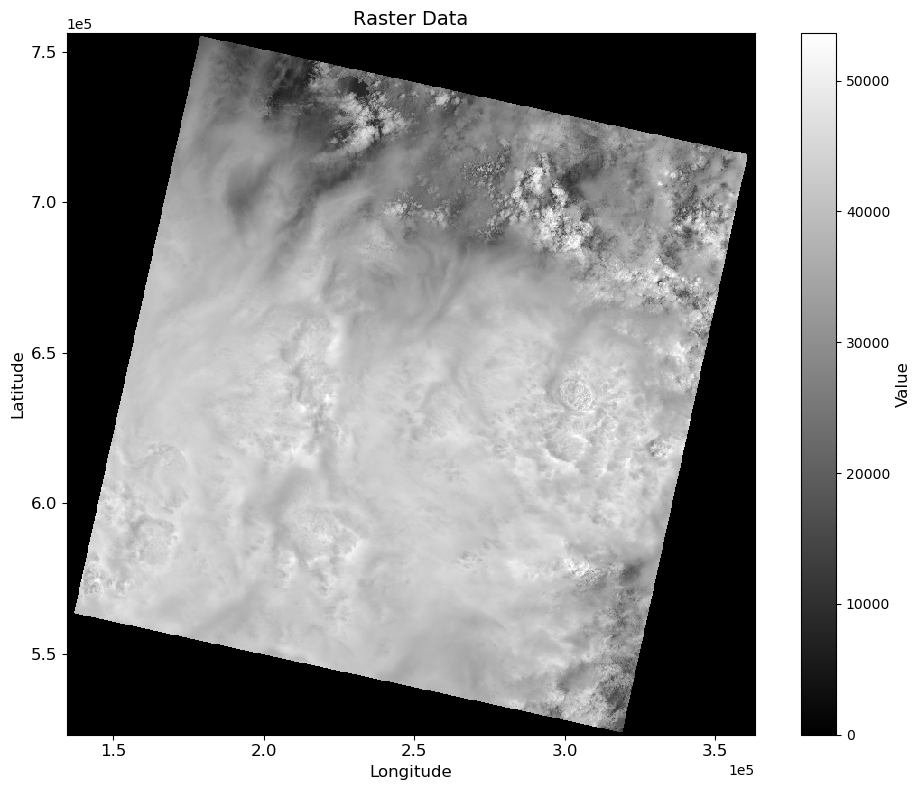

In [5]:
raster_plotting.plot_raster_data(ds.x, ds.y, ds[0], sampling=10)

## Sentinel 2

In [7]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2A_MSIL2A_20180102T154111_R068_T18NTN_20201014T024740"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)

signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B11', 'B12', 'B8A', 'SCL', 'WVP', 'visual', 'preview')

asset_href = signed_item.assets["B05"].href
ds = rioxarray.open_rasterio(asset_href)  # dims: band, y, x

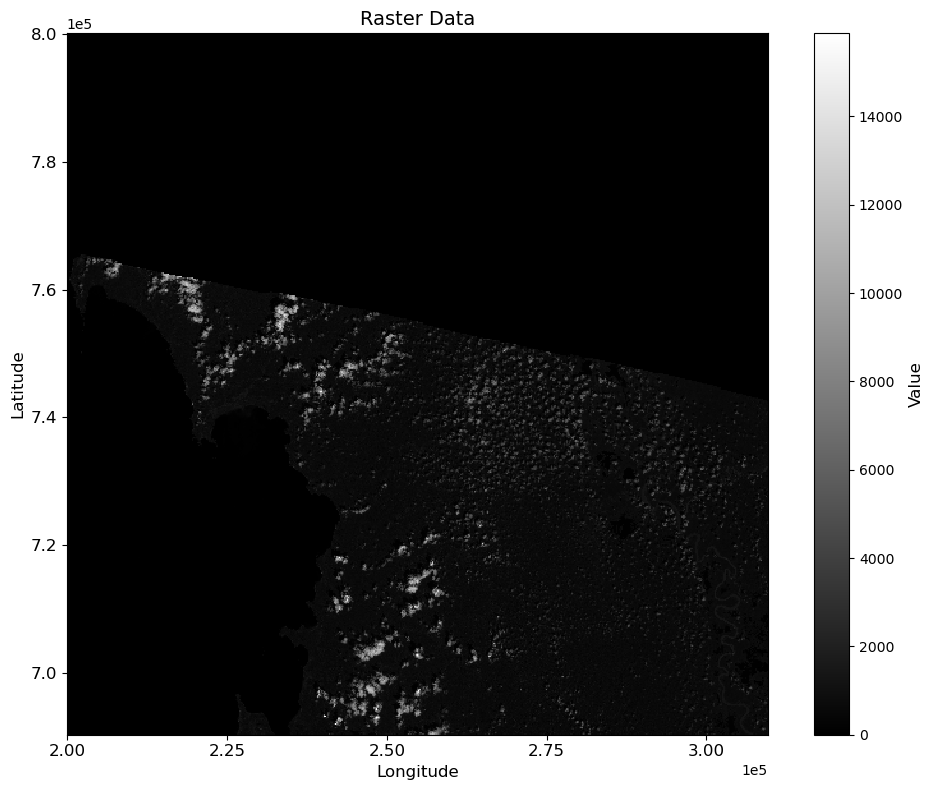

In [8]:
raster_plotting.plot_raster_data(ds.x, ds.y, ds[0], sampling=10)

In [7]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2A_MSIL2A_20180102T154111_R068_T18NTN_20201014T024740"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)

signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B11', 'B12', 'B8A', 'SCL', 'WVP', 'visual', 'preview')
bands = []
for i in ["B02", "B03", "B04"]:
    asset_href = signed_item.assets[i].href
    ds = rioxarray.open_rasterio(asset_href)  # dims: band, y, x
    bands.append(ds)

ds_combined = xr.concat(bands, dim="band")
print(ds_combined.shape)

(3, 10980, 10980)


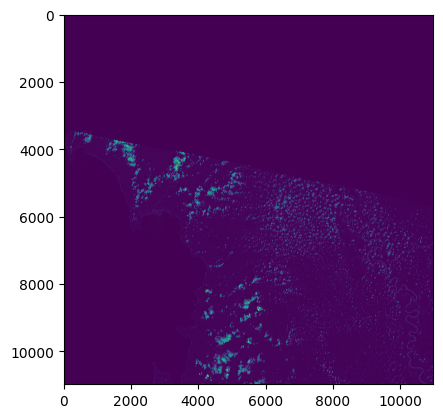

In [8]:
plt.figure()
plt.imshow(ds_combined.transpose('y', 'x', 'band').values[..., 2])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..17584].


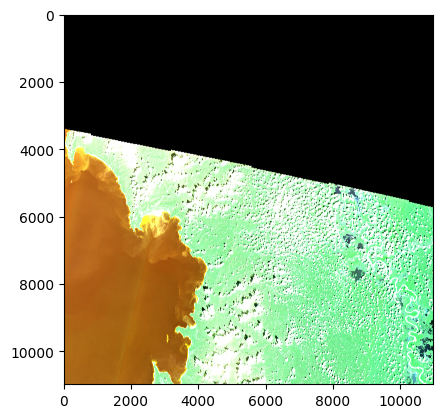

In [9]:
plt.figure()
plt.imshow(ds_combined.transpose('y', 'x', 'band').values)
plt.show()